In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/garments_worker_productivity.csv")

In [4]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['quarter'] = label_encoder.fit_transform(df['quarter'])
df['department'] = label_encoder.fit_transform(df['department'])
df['day'] = label_encoder.fit_transform(df['day'])


In [6]:
df_nans_dropped = df.dropna()
df_nans_filled = df.fillna(df.mean())

<ipython-input-6-5f0a9cb6f1f7>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_nans_filled = df.fillna(df.mean())


In [7]:
df_x = df_nans_filled.drop(labels=["date", "actual_productivity"], axis=1)
df_y = df_nans_filled[['actual_productivity']]

In [8]:
df_x.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,2,3,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0
1,0,1,3,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0
2,0,2,3,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5
3,0,2,3,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5
4,0,2,3,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_nrm = scaler.fit_transform(df_x)

In [11]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, y_train, y_test = train_test_split(x_nrm, df_y.values.reshape((-1, )), train_size=0.8)

print(df_x_train.shape, y_train.shape, df_x_test.shape, y_test.shape)

(957, 13) (957,) (240, 13) (240,)


In [48]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, activation='relu', input_shape=df_x_train.shape[1:]))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, 'linear'))

In [49]:
model.compile(optimizer='adam', loss="mae", metrics="mse")

In [50]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               3584      
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 8)                 264       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 47,089
Trainable params: 47,089
Non-trai

In [51]:
results = model.fit(
    df_x_train, y_train, epochs=25,
    validation_data=(df_x_test, y_test), batch_size=5)

Epoch 1/25
192/192 [==============================] - 2s 4ms/step - loss: 0.1582 - mse: 0.0529 - val_loss: 0.1053 - val_mse: 0.0218
Epoch 2/25
192/192 [==============================] - 1s 3ms/step - loss: 0.1209 - mse: 0.0276 - val_loss: 0.1167 - val_mse: 0.0233
Epoch 3/25
192/192 [==============================] - 1s 3ms/step - loss: 0.1125 - mse: 0.0249 - val_loss: 0.0906 - val_mse: 0.0177
Epoch 4/25
192/192 [==============================] - 1s 3ms/step - loss: 0.1032 - mse: 0.0217 - val_loss: 0.0960 - val_mse: 0.0207
Epoch 5/25
192/192 [==============================] - 1s 3ms/step - loss: 0.1012 - mse: 0.0218 - val_loss: 0.1061 - val_mse: 0.0210
Epoch 6/25
192/192 [==============================] - 0s 3ms/step - loss: 0.0982 - mse: 0.0204 - val_loss: 0.0859 - val_mse: 0.0158
Epoch 7/25
192/192 [==============================] - 1s 3ms/step - loss: 0.0934 - mse: 0.0191 - val_loss: 0.0904 - val_mse: 0.0164
Epoch 8/25
192/192 [==============================] - 1s 3ms/step - loss: 0.

In [52]:
yhat_test = model.predict(df_x_test)

8/8 [==============================] - 0s 2ms/step


In [53]:
import matplotlib.pyplot as plt

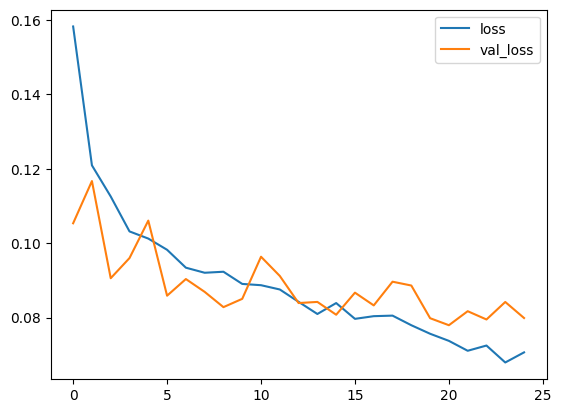

In [54]:
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.legend()

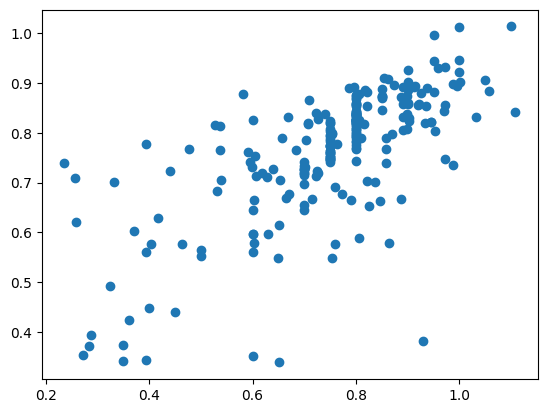

In [55]:
plt.scatter(y_test, yhat_test)